In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker
import os
working_directory=os.getcwd()
print(working_directory)

/Users/jiayiwang/Documents/Data_Career/Python/Kaggle/Superstore Sales


In [25]:
path=working_directory + '/train 2.csv'

In [26]:
df=pd.read_csv(path)

In [27]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [28]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


Checking null values and fill null values

In [29]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [30]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [31]:
df['Postal Code']=df['Postal Code'].fillna(5401)

In [32]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


Change date format

In [34]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")

In [35]:
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [92]:
df['Order Date'].head(5)

0   2017-11-08
1   2017-11-08
2   2017-06-12
3   2016-10-11
4   2016-10-11
Name: Order Date, dtype: datetime64[ns]

In [93]:
df['Ship Date'].head(5)

0   2017-11-11
1   2017-11-11
2   2017-06-16
3   2016-10-18
4   2016-10-18
Name: Ship Date, dtype: datetime64[ns]

Revenue generated by each category

In [39]:
Top_category=df.groupby(['Category']).sum().sort_values('Sales',ascending=False)
Top_category=Top_category[['Sales']]
total_revenue_category=Top_category['Sales'].sum()
total_revenue_category=str(int(total_revenue_category))
total_revenue_category='S'+total_revenue_category 
Top_category.reset_index(inplace=True)

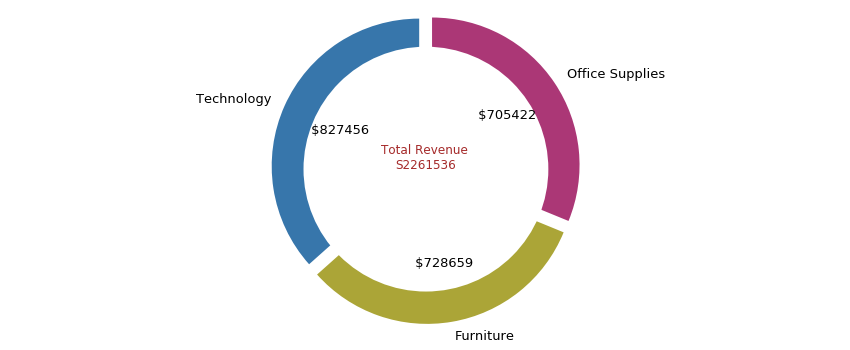

In [49]:
plt.rcParams["figure.figsize"] = (12,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 13.0 # Font size is defined
plt.rcParams['font.weight'] = 7 # Font weight is defined
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(values):
    def my_format(pct):
        total=sum(values)
        val=int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format
colors=['#3776ab', '#aba537', '#ab3776'] # Colors are defined for the pie chart
explode=(0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Sales'], colors=colors, labels=Top_category['Category'], autopct=autopct_format(Top_category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.83,fc='white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Add the circle on the pie chart
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n'+str(total_revenue_category),color = 'brown', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

Products contributed to the revenue

In [51]:
Top_products=df.groupby(['Product Name']).sum().sort_values('Sales',ascending=False).head(8)
Top_products=Top_products[['Sales']].round(2)
Top_products.reset_index(inplace=True)
total_revenue_products=Top_products['Sales'].sum()
total_revenue_products=str(int(total_revenue_products))
total_revenue_products='$'+total_revenue_products

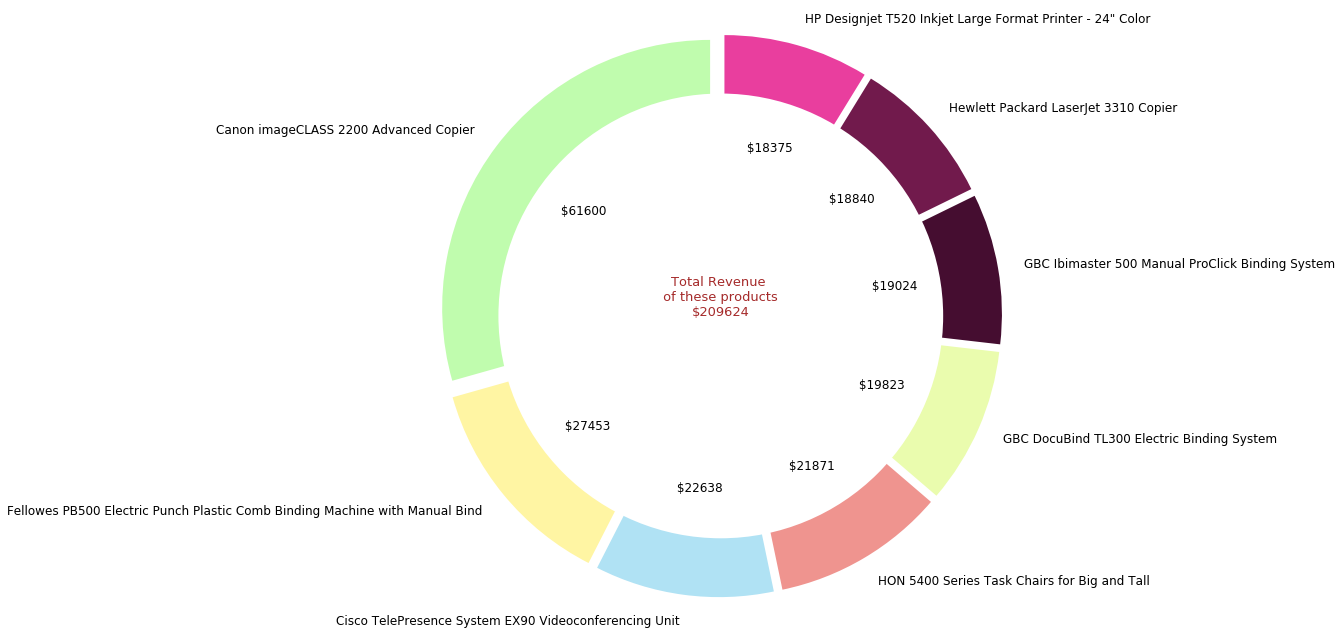

In [59]:
plt.rcParams['figure.figsize']=(15,9)
plt.rcParams['font.size'] = 12.0 # Font size is defined
colors=['#c0fcae','#fff5a3','#b0e2f4','#ef948f','#eafcae','#450d30',
'#711a4c','#e93e9e'] # Colors are defined for the pie chart
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_products['Sales'], colors=colors, labels=Top_products['Product Name'], autopct=autopct_format(Top_products['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.83,fc='white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Add the circle on the pie chart
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n of these products \n'+str(total_revenue_products),color = 'brown', xy=(0, 0), fontsize=13, ha="center")
plt.tight_layout()
plt.show()

Revenue generated by each Sub-Category

In [60]:
Top_segment = df.groupby(["Segment"]).sum().sort_values("Sales", ascending=False) 
Top_segment = Top_segment[["Sales"]] 
Top_segment.reset_index(inplace=True) 
total_revenue_segement = Top_segment["Sales"].sum() 
total_revenue_segement = str(int(total_revenue_segement)) 
total_revenue_segement= '$' + total_revenue_segement # Adding '$' sign before the Value

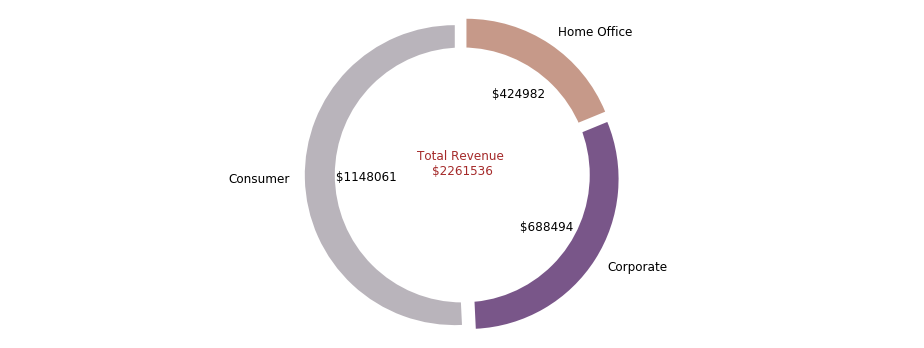

In [65]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
colors = ['#b9b4bb','#795689','#c69989'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_segment['Sales'], colors = colors, labels=Top_segment['Segment'], autopct= autopct_format(Top_segment['Sales']),startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.85,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_revenue_segement),color = 'brown', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

Region vs Revenue

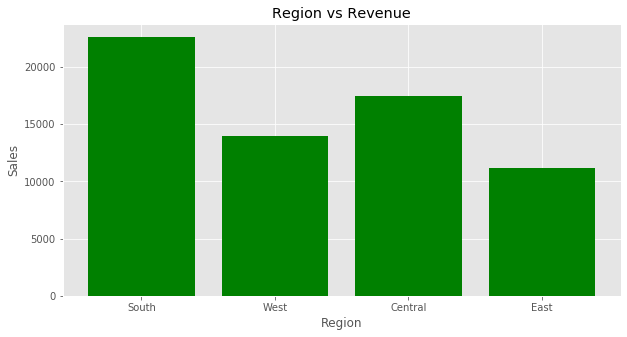

In [74]:
plt.figure(figsize = (10,5))

plt.bar(df['Region'], df['Sales'], color='green')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Region vs Revenue')
plt.show()

Heatmap

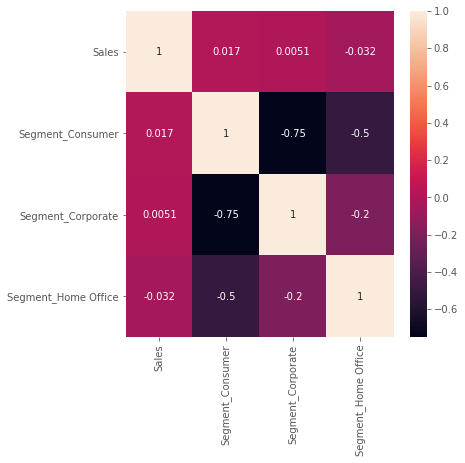

In [78]:
df1=df[['Segment','Sales']]
df2=pd.get_dummies(df1)
df_cor=df2.corr()
plt.figure(figsize=(6,6))
fig=sns.heatmap(data=df_cor.corr(),annot=True)
plt.show()

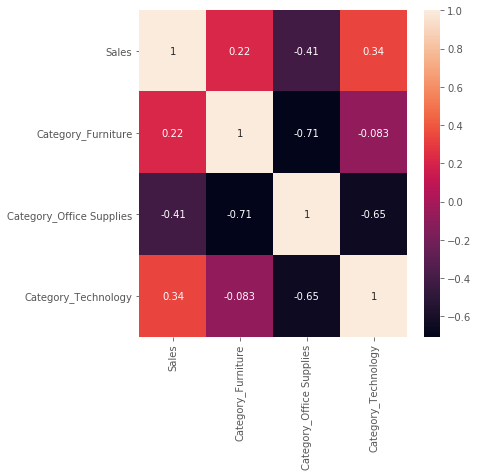

In [79]:
df1=df[['Category','Sales']]
df2=pd.get_dummies(df1)
df_cor=df2.corr()
plt.figure(figsize=(6,6))
fig=sns.heatmap(data=df_cor.corr(),annot=True)
plt.show()

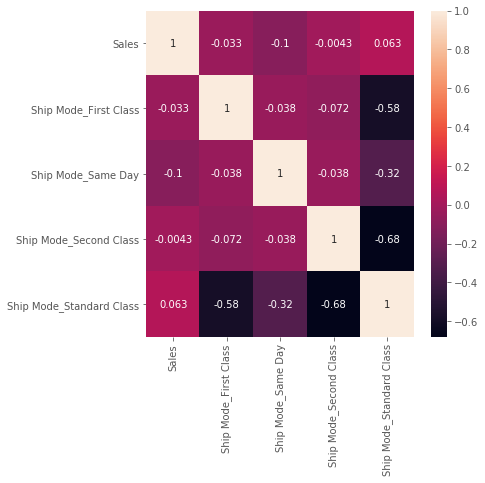

In [80]:
df1=df[['Ship Mode','Sales']]
df2=pd.get_dummies(df1)
df_cor=df2.corr()
plt.figure(figsize=(6,6))
fig=sns.heatmap(data=df_cor.corr(),annot=True)
plt.show()

Top 5 states of sales

In [81]:
df.groupby('State').sum().sort_values('Sales').tail(5)

,Row ID,Postal Code,Sales
State,,,
Pennsylvania,2718795,11094945.0,116276.6500
Washington,2564655,49465481.0,135206.8500
Texas,4966826,74825178.0,168572.5322
New York,5145327,11511840.0,306361.1470
California,9592568,179328411.0,446306.4635


In [84]:
df_new=df[df['State'].isin(['California','New York','Texas','Washington','Pennsylvania'])]

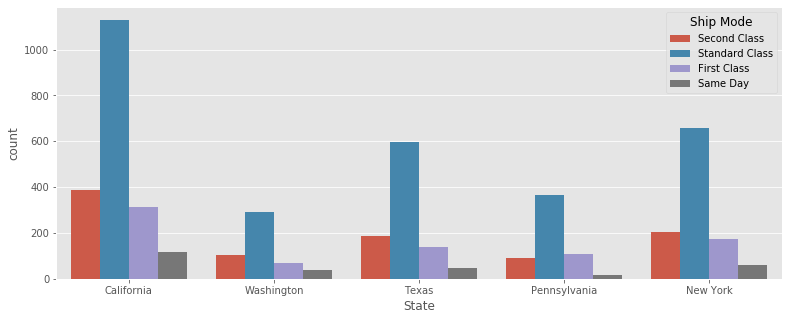

In [85]:
sns.countplot(x='State',hue='Ship Mode',data=df_new)

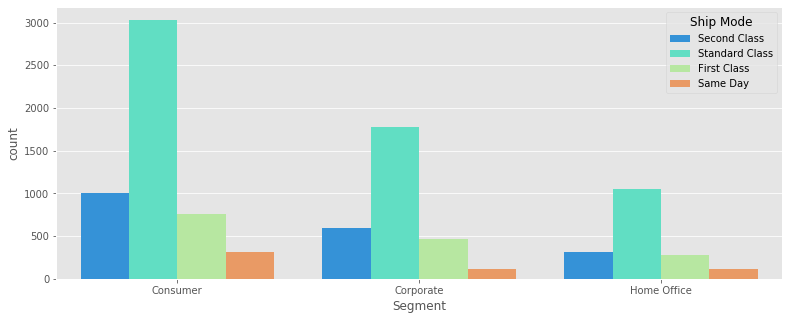

In [88]:
sns.countplot(x='Segment' ,hue = 'Ship Mode', data =df, palette='rainbow')